In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("/content/reviewsLocs.csv")

# Check if required columns exist
if 'Location' not in data.columns or 'CompleteStoreName' not in data.columns:
    print("The dataset must contain 'Location' and 'CompleteStoreName' columns.")
    exit()

# Get unique towns
unique_towns = data['Location'].unique()

# Display the count of unique towns
print(f"Total unique towns with restaurant reviews: {len(unique_towns)}")

# Display all unique towns and restaurants in each town
print("\nUnique towns and their restaurants:")
for town in unique_towns:
    # Filter restaurants in the current town
    restaurants = data[data['Location'] == town]['CompleteStoreName'].unique()
    print(f"\nTown: {town}")
    print(f"Total Restaurants: {len(restaurants)}")
    print(f"Restaurants: {', '.join(restaurants)}")


Total unique towns with restaurant reviews: 207

Unique towns and their restaurants:

Town: Cavalry Ground
Total Restaurants: 7
Restaurants: Jalal Sons - Cavalry Ground, Ahmad Dahi Bhallay - Cavalry Ground, Dera Restaurant - Cavalry Ground, New Ahmad Dahi Bhallay & Special Bar.B.Q, Pizza Hot - Cavalry Ground, Malik Fast Food, Pulao House & Restaurant

Town: DHA or Mall Road
Total Restaurants: 1
Restaurants: Hifny Tifny

Town: DHA
Total Restaurants: 168
Restaurants: Foodcourt by Hifny Tifny, Mama Bearâ€™s Cookery, CAKE ROOM BY FAIZA AZAM, GoGo Restaurant, Lahore Broast - DHA, Clifton Grill, SOLO INDULGENCES, Ibn Al Shaam Restaurant, Benediction, AHMAD HOME CHEF, Chef Shahid, Feeha's, Dessert & Co, Rafayel By Rafayel, OX & Grill Steak House, EEDON RESTAURANT, Jani Yakhni Pulao, STOP FOR DELICIOUS MEAL, Quetta Shinwari Family Restaurant, Cafe Elliana, Liu's Kim Mun Chinese By Hsin Kuang, Karachi Red Rock & BBQ, New Beijing, Stop for Meal, Yummy wheels, NYC Burgers, Zulfi Burgers, Desi Ove

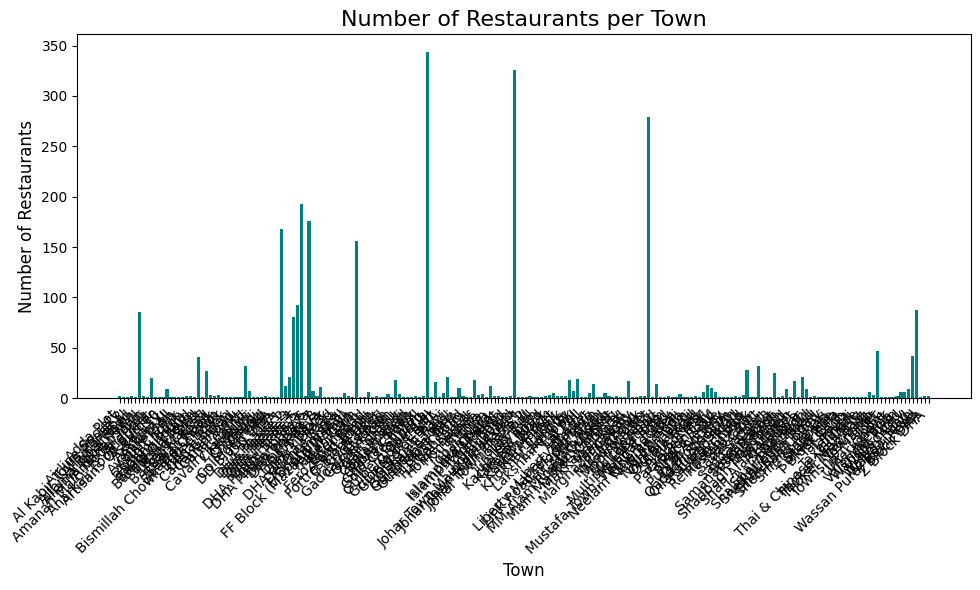

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
#data = pd.read_csv("/content/reviewsLoc.csv")

# Check if required columns exist
if 'Location' not in data.columns or 'CompleteStoreName' not in data.columns:
    print("The dataset must contain 'Location' and 'CompleteStoreName' columns.")
    exit()

# Group data by Location and count unique restaurants in each town
town_restaurant_counts = data.groupby('Location')['CompleteStoreName'].nunique().reset_index()
town_restaurant_counts.columns = ['Town', 'RestaurantCount']

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(town_restaurant_counts['Town'], town_restaurant_counts['RestaurantCount'], color='teal')
plt.title('Number of Restaurants per Town', fontsize=16)
plt.xlabel('Town', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import time

# Load the CSV file
#data = pd.read_csv("/content/reviewsLoc.csv")

# Get unique town names
unique_towns = data['Location'].unique()

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to fetch latitude and longitude for a location
def get_lat_long(town):
    try:
        location = geolocator.geocode(f"{town}, Lahore, Pakistan")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error fetching location for {town}: {e}")
        return None, None

# Create a dictionary to store results
town_coordinates = {}

# Fetch latitude and longitude for each town
for town in unique_towns:
    print(f"Fetching coordinates for: {town}")
    lat, lon = get_lat_long(town)
    town_coordinates[town] = (lat, lon)
    time.sleep(1)  # Adding delay to avoid API rate limits

# Convert results to DataFrame
coordinates_df = pd.DataFrame.from_dict(town_coordinates, orient='index', columns=['Latitude', 'Longitude'])
coordinates_df.reset_index(inplace=True)
coordinates_df.rename(columns={'index': 'Town'}, inplace=True)

# Save results to a CSV file
coordinates_df.to_csv("town_coordinates.csv", index=False)

print("\nLatitude and Longitude fetched successfully!")
print(coordinates_df)


Fetching coordinates for: Cavalry Ground
Fetching coordinates for: DHA or Mall Road
Fetching coordinates for: DHA
Fetching coordinates for: Gulberg
Fetching coordinates for: Gulberg or DHA
Fetching coordinates for: DHA Phase 5
Fetching coordinates for: DHA Phase 3
Fetching coordinates for: Cantt
Fetching coordinates for: DHA Phase 4
Fetching coordinates for: DHA Phase 6
Fetching coordinates for: Gulberg or Cantt
Fetching coordinates for: Artisans Of Burger
Fetching coordinates for: Model Town
Fetching coordinates for: Walled City
Fetching coordinates for: Multiple Locations
Fetching coordinates for: Allama Iqbal Town
Fetching coordinates for: Walton Road
Fetching coordinates for: Johar Town
Fetching coordinates for: MM Alam Road
Fetching coordinates for: MM Alam
Fetching coordinates for: Fortress Stadium
Fetching coordinates for: Liberty
Fetching coordinates for: Mall Road
Fetching coordinates for: Main Market
Fetching coordinates for: G Block DHA
Fetching coordinates for: H Block DHA


Fetching coordinates for: Barkat Market
Fetching coordinates for: Joray Pull
Fetching coordinates for: Ferozepur Road
Fetching coordinates for: Thai & Chinese - Gulberg
Fetching coordinates for: FF Block (Mazang Walay)
Fetching coordinates for: Garden Town
Fetching coordinates for: DD DHA
Fetching coordinates for: Shadman
Fetching coordinates for: DD Block DHA
Fetching coordinates for: Shahdara
Fetching coordinates for: Wahdat Road
Fetching coordinates for: Shalimar
Fetching coordinates for: Samanabad
Fetching coordinates for: Ichra
Fetching coordinates for: Mozang
Fetching coordinates for: Ichhra
Fetching coordinates for: Lahore
Fetching coordinates for: Gari Shahu
Fetching coordinates for: Sultan Pura
Fetching coordinates for: Homechef
Fetching coordinates for: Lal Pull
Fetching coordinates for: Allama Iqbal
Fetching coordinates for: Allama Iqbal Road
Fetching coordinates for: DHA Phase 8
Fetching coordinates for: Faisal Town
Fetching coordinates for: Liberty Market
Fetching coordina

Fetching coordinates for: Township
Fetching coordinates for: Ghoray Shah
Fetching coordinates for: Home-based
Fetching coordinates for: Shah Alam Market
Fetching coordinates for: Anarkali
Fetching coordinates for: Wapda Town
Fetching coordinates for: Karim Block
Fetching coordinates for: Rustam Park
Fetching coordinates for: Gawalmandi
Fetching coordinates for: Shadbagh
Fetching coordinates for: Neelam Cinema Area
Fetching coordinates for: Kareem Block
Fetching coordinates for: Sabzazar
Fetching coordinates for: New Anarkali
Fetching coordinates for: Gulshan-E-Ravi
Fetching coordinates for: Defence Raya
Fetching coordinates for: DHA Phase 6, Raya
Fetching coordinates for: Main Market, Gulberg
Fetching coordinates for: DHA Phase 5, Raya
Fetching coordinates for: Gulshan-e-Ravi
Fetching coordinates for: Wassan Pura, Ravi Road
Fetching coordinates for: Johar Town Phase 2
Fetching coordinates for: Mustafa Town, Wahdat Road
Fetching coordinates for: Township Market
Fetching coordinates for:

# Next

In [ ]:
!pip install scikit-learn --upgrade

# Updated imports at the beginning of the notebook/script:
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, classification_report, mean_squared_error,
    mean_absolute_error, r2_score, accuracy_score, precision_score,
    recall_score, f1_score, ConfusionMatrixDisplay  # Import ConfusionMatrixDisplay here
)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from geopy.distance import geodesic
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 43.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
def fetch_user_location():
    # Simulated user location; replace with real location fetching logic
    user_lat = 31.4645  # Example: Lahore coordinates
    user_lon = 74.2563
    return (user_lat, user_lon)


In [ ]:
def get_closest_town(user_location, town_coordinates):
    closest_town = None
    min_distance = float('inf')

    for _, row in town_coordinates.iterrows():
        # Ensure the row has valid latitude and longitude
        if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
            town_location = (row['Latitude'], row['Longitude'])
            distance = geodesic(user_location, town_location).kilometers
            if distance < min_distance:
                min_distance = distance
                closest_town = row['Town']

    return closest_town


In [ ]:
def analyze_sentiment_and_rank(filtered_data):
    sid = SentimentIntensityAnalyzer()
    filtered_data['text'] = filtered_data['text'].astype(str)

    # Analyze sentiment of reviews
    filtered_data['SentimentScore'] = filtered_data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

    # Weighted Score: 70% rating, 30% sentiment score
    filtered_data['WeightedScore'] = (
        filtered_data['AverageRating'] * 0.7 + filtered_data['SentimentScore'] * 0.3
    )

    # Remove duplicates based on CompleteStoreName
    recommended_restaurants = filtered_data.drop_duplicates(subset=['CompleteStoreName'], keep='first')
    recommended_restaurants = recommended_restaurants.sort_values(by=['WeightedScore'], ascending=False)
    return recommended_restaurants


In [ ]:
def filter_restaurants(data, detected_town, food_type_input):
    filtered_data = data[
        (data['Location'].str.contains(detected_town, case=False)) &
        (data['FoodType'].str.contains(food_type_input, case=False))
    ]
    return filtered_data


In [ ]:
def evaluate_sentiment(filtered_data):
    if 'SentimentTrue' in filtered_data.columns and not filtered_data.empty:
        y_true = filtered_data['SentimentTrue']
        y_pred = filtered_data['SentimentScore'].apply(lambda x: 'positive' if x > 0 else 'negative')

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, pos_label='positive')
        recall = recall_score(y_true, y_pred, pos_label='positive')
        f1 = f1_score(y_true, y_pred, pos_label='positive')

        print("\nClassification Metrics:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")

        ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
        plt.show()
    else:
        print("Sentiment evaluation skipped: 'SentimentTrue' column is missing or no data after filtering.")


In [ ]:
def evaluate_ratings(filtered_data):
    if 'PredictedRating' in filtered_data.columns and 'AverageRating' in filtered_data.columns and not filtered_data.empty:
        y_true = filtered_data['AverageRating']
        y_pred = filtered_data['PredictedRating']

        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        print("\nRegression Metrics:")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"R2 Score: {r2:.2f}")
    else:
        print("Regression evaluation skipped: Necessary columns are missing or no data after filtering.")


In [ ]:
def plot_top_restaurants(recommended_restaurants, top_n=10):
    top_restaurants = recommended_restaurants.head(top_n)

    plt.figure(figsize=(12, 6))
    plt.barh(top_restaurants['CompleteStoreName'], top_restaurants['WeightedScore'], color='skyblue')
    plt.title(f"Top {top_n} Recommended Restaurants Based on Weighted Score")
    plt.xlabel('Weighted Score')
    plt.ylabel('Restaurant Name')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


User's location: (31.4645, 74.2563)
Enter food type: Pakistani


<ipython-input-4-106d2ed0c9a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['text'] = filtered_data['text'].astype(str)
<ipython-input-4-106d2ed0c9a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['SentimentScore'] = filtered_data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
<ipython-input-4-106d2ed0c9a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See


Classification Metrics:
Accuracy: 0.56
Precision: 0.99
Recall: 0.55
F1 Score: 0.71


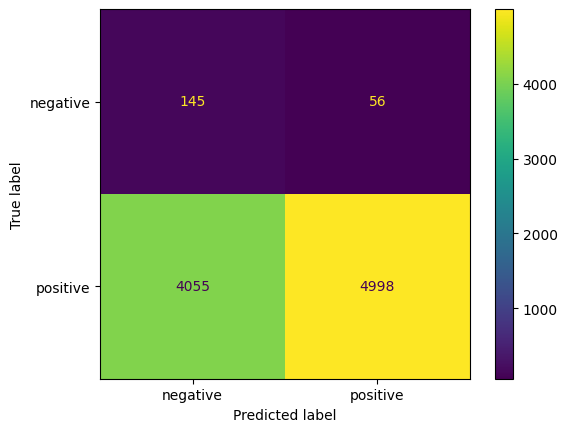

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  # consistently return the same eager evaluated value.



Regression Metrics:
RMSE: 0.41
MAE: 0.41
R2 Score: -0.45


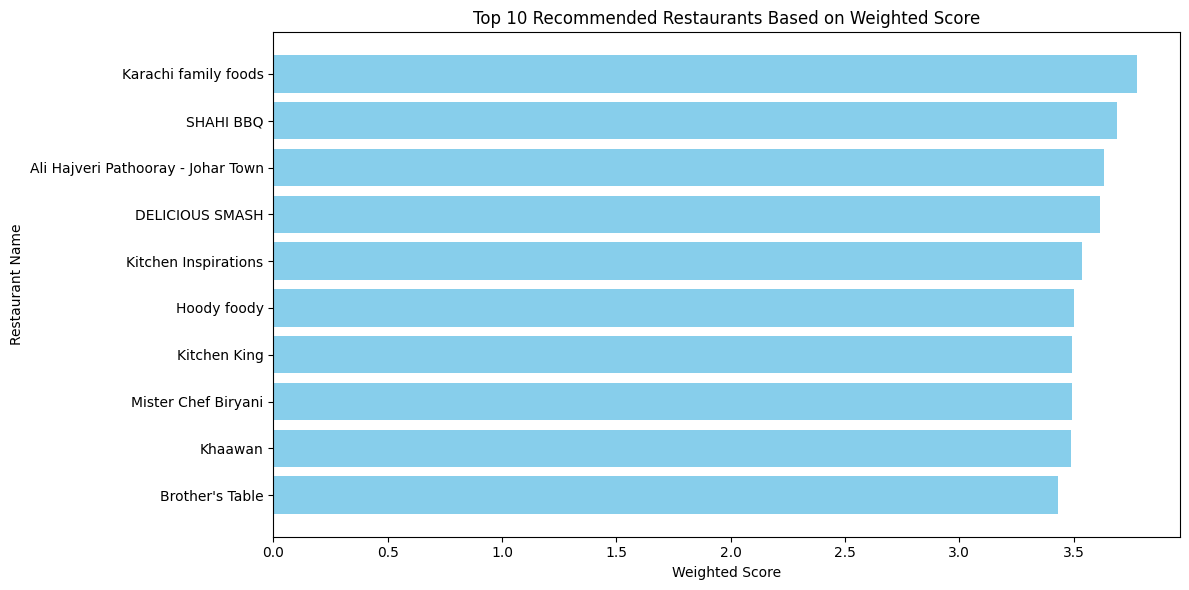

In [ ]:
def main():
    # Load data
    data = pd.read_csv("/content/reviewsLocs.csv")

    # Load coordinates of towns in Lahore
    town_coordinates = pd.read_csv("town_coordinates.csv")
    town_coordinates = town_coordinates.dropna(subset=['Latitude', 'Longitude'])

    # Simulate columns for testing (replace with actual data in production)
    data['SentimentTrue'] = data['AverageRating'].apply(lambda x: 'positive' if x > 3 else 'negative')
    data['PredictedRating'] = data['AverageRating'] + (data['AverageRating'] * 0.1)

    # Fetch user's location
    user_location = fetch_user_location()
    print(f"User's location: {user_location}")

    # Determine closest town
    detected_town = get_closest_town(user_location, town_coordinates)

    if not detected_town:
        print("Unable to detect a nearby town. Please enter your town manually.")
        detected_town = input("Enter your town: ").strip()

    # Get user input for food type
    food_type_input = input("Enter food type: ").strip()


    # Filter restaurants
    filtered_data = filter_restaurants(data, detected_town, food_type_input)

    # Analyze sentiment and rank restaurants
    recommended_restaurants = analyze_sentiment_and_rank(filtered_data)

    # Evaluate sentiment and regression
    evaluate_sentiment(filtered_data)
    evaluate_ratings(filtered_data)

    # Plot top recommendations
    plot_top_restaurants(recommended_restaurants)

if __name__ == "__main__":
    main()